## Proyecto Security Data Science

### Fase 1: Exploración de datos e Ingeniería de características

### Miembros
* Fernanda Esquivel - 21542

### Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/SDS-Project)

## Exploración de Datos (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Carga del Dataset

In [3]:
df = pd.read_csv('dataset\dataset_feature_engineering.csv')
print(f"Dataset cargado correctamente. Forma: {df.shape}")

Dataset cargado correctamente. Forma: (1852394, 35)


In [4]:
#Primeras filas
print("\nPrimeras 5 filas del dataset:")
print(df.head())


Primeras 5 filas del dataset:
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt      first     last gender                        street  \
0    4.97   Jennifer    Banks      F                561 Perry Cove   
1  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393   
2  220.11     Edward  Sanchez      M      594 White Dale Suite 530   
3   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038   
4   41.96      Tyler   Garcia      M              408 Bradley Rest   

             city state  ...  first_time_at_merchant  \
0  Moravian Falls    NC  ...                   

In [5]:
#Información general del dataset
print("\nInformación general del dataset:")
print(df.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num           

In [6]:
#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.

In [7]:
#Verificación de valores nulos
nullCounter = df.isnull().sum()
print("\nValores nulos por columna:")
print(nullCounter[nullCounter > 0] if len(nullCounter[nullCounter > 0]) > 0 else "No hay valores nulos")


Valores nulos por columna:
No hay valores nulos


### Análisis de distribución y balanceo de clases

In [8]:
print("\nDistribución de transacciones fraudulentas vs legítimas:")
fraudDist = df['is_fraud'].value_counts(normalize=True) * 100
print(fraudDist)


Distribución de transacciones fraudulentas vs legítimas:
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


#### Balance de clases

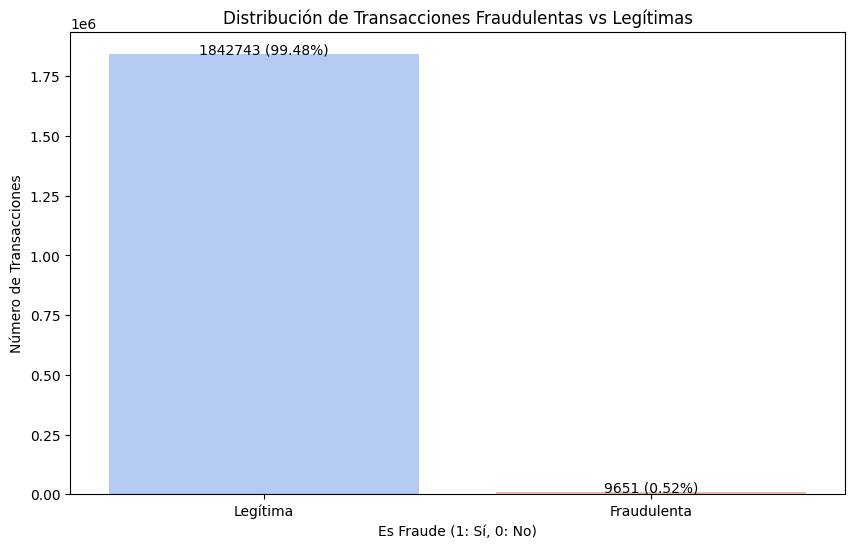

In [9]:
#Visualización del balance de clases
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df, palette='coolwarm')
plt.title('Distribución de Transacciones Fraudulentas vs Legítimas')
plt.xlabel('Es Fraude (1: Sí, 0: No)')
plt.ylabel('Número de Transacciones')
plt.xticks([0, 1], ['Legítima', 'Fraudulenta'])
for i, count in enumerate(df['is_fraud'].value_counts()):
    plt.text(i, count+100, f"{count} ({fraudDist[i]:.2f}%)", ha='center')
plt.savefig('graphs/class_balance.png')

#### Distribución temporal de las transacciones

In [10]:
#Visualizar distribución temporal de las transacciones
#Convertir unix_time a formato datetime
df['date'] = pd.to_datetime(df['unix_time'], unit='s')

In [11]:
#Distribución por mes y año
df['month_year'] = df['date'].dt.strftime('%Y-%m')

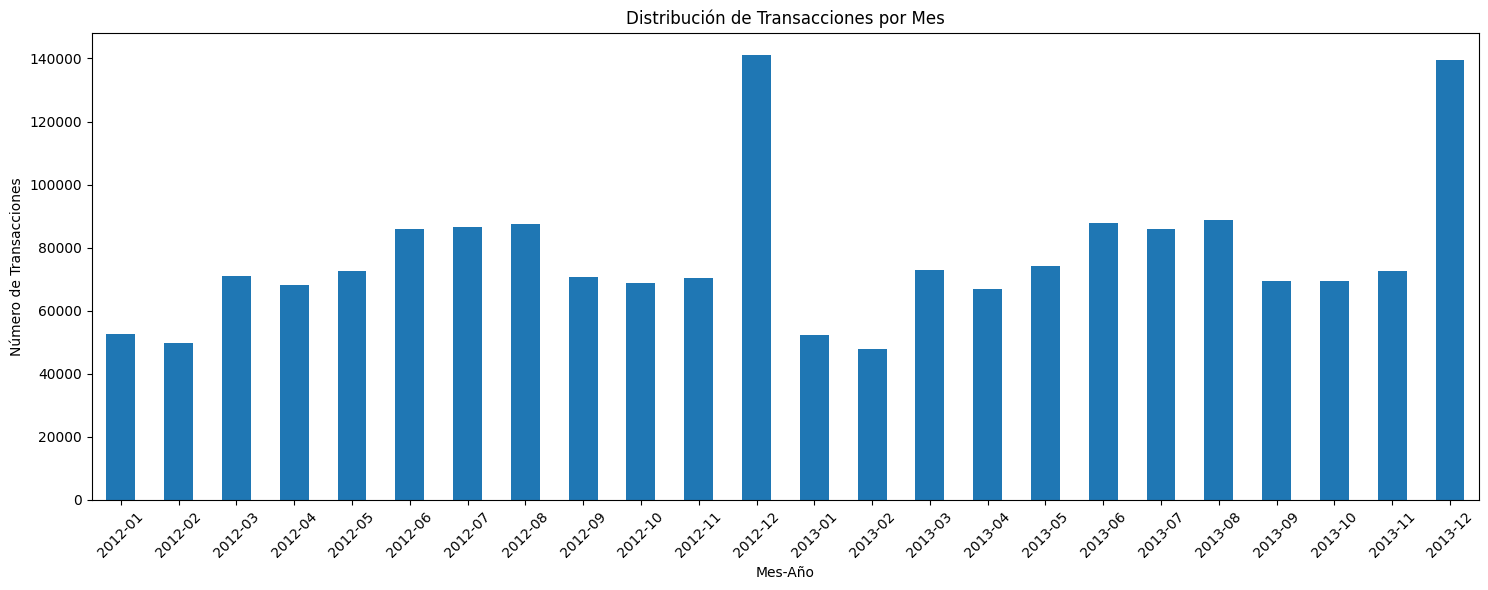

In [12]:
plt.figure(figsize=(15, 6))
monthCounts = df.groupby('month_year').size()
monthCounts.plot(kind='bar')
plt.title('Distribución de Transacciones por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/temporal_distribution.png')

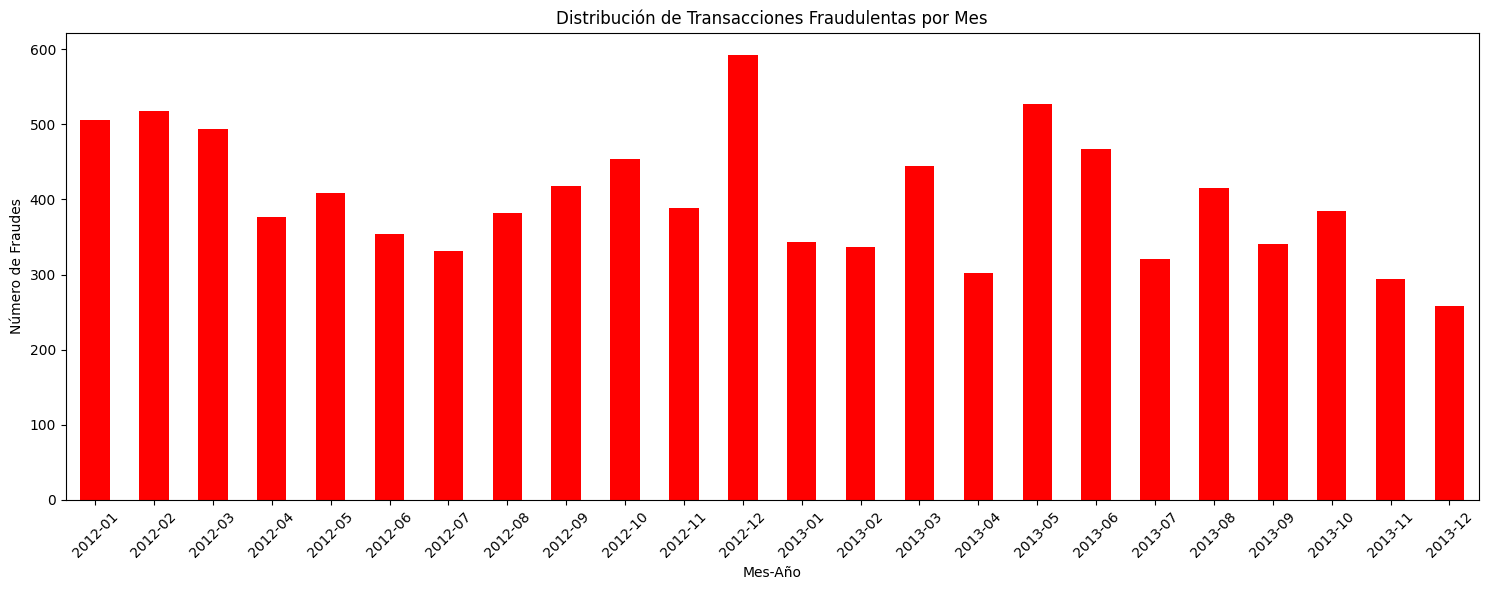

In [13]:
#Distribución de fraudes por mes
plt.figure(figsize=(15, 6))
fraudByMonth = df[df['is_fraud'] == 1].groupby('month_year').size()
fraudByMonth.plot(kind='bar', color='r')
plt.title('Distribución de Transacciones Fraudulentas por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Número de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/fraud_per_Month.png')

# excluir diciembre (mes de testing)

#### Tasas de fraude por hora del día

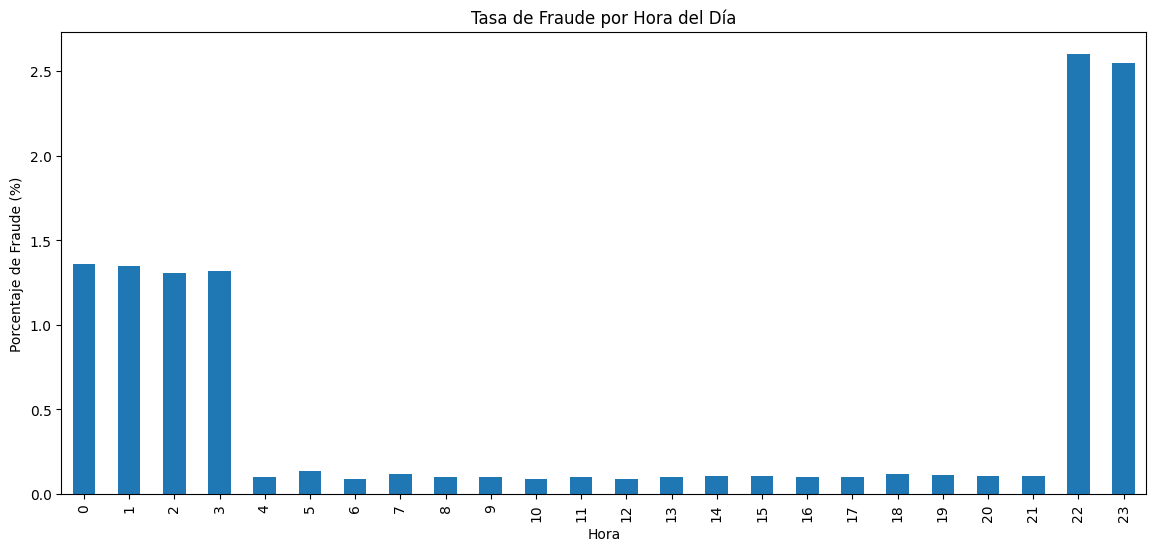

In [14]:
#Visualizar tasas de fraude por hora del día
plt.figure(figsize=(14, 6))
fraudByHour = df.groupby('hour')['is_fraud'].mean() * 100
fraudByHour.plot(kind='bar')
plt.title('Tasa de Fraude por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Porcentaje de Fraude (%)')
plt.savefig('graphs/fraud_per_hour.png')

# farmacias, gasolineras, 7 eleven (super 24), etc...

### Tasa de fraude por comercio para transacciones nocturnas

In [15]:
#Filtrar transacciones nocturnas (entre 22:00 y 3:00)
nightTransactions = df[(df['hour'] >= 22) | (df['hour'] <= 3)]

In [16]:
#Calcular la tasa de fraude por comercio para transacciones nocturnas
nightFraud = nightTransactions.groupby('merchant')['is_fraud'].agg(['mean', 'count'])
nightFraud['fraud_percentage'] = nightFraud['mean'] * 100
nightFraud = nightFraud.sort_values('fraud_percentage', ascending=False)

In [17]:
#Filtrar comercios con al menos 50 transacciones (para tener suficientes datos)
nightFraudFiltered = nightFraud[nightFraud['count'] >= 50]

In [18]:
#Mostrar los 15 comercios con mayor tasa de fraude
topFraudMerchants = nightFraudFiltered.head(15)

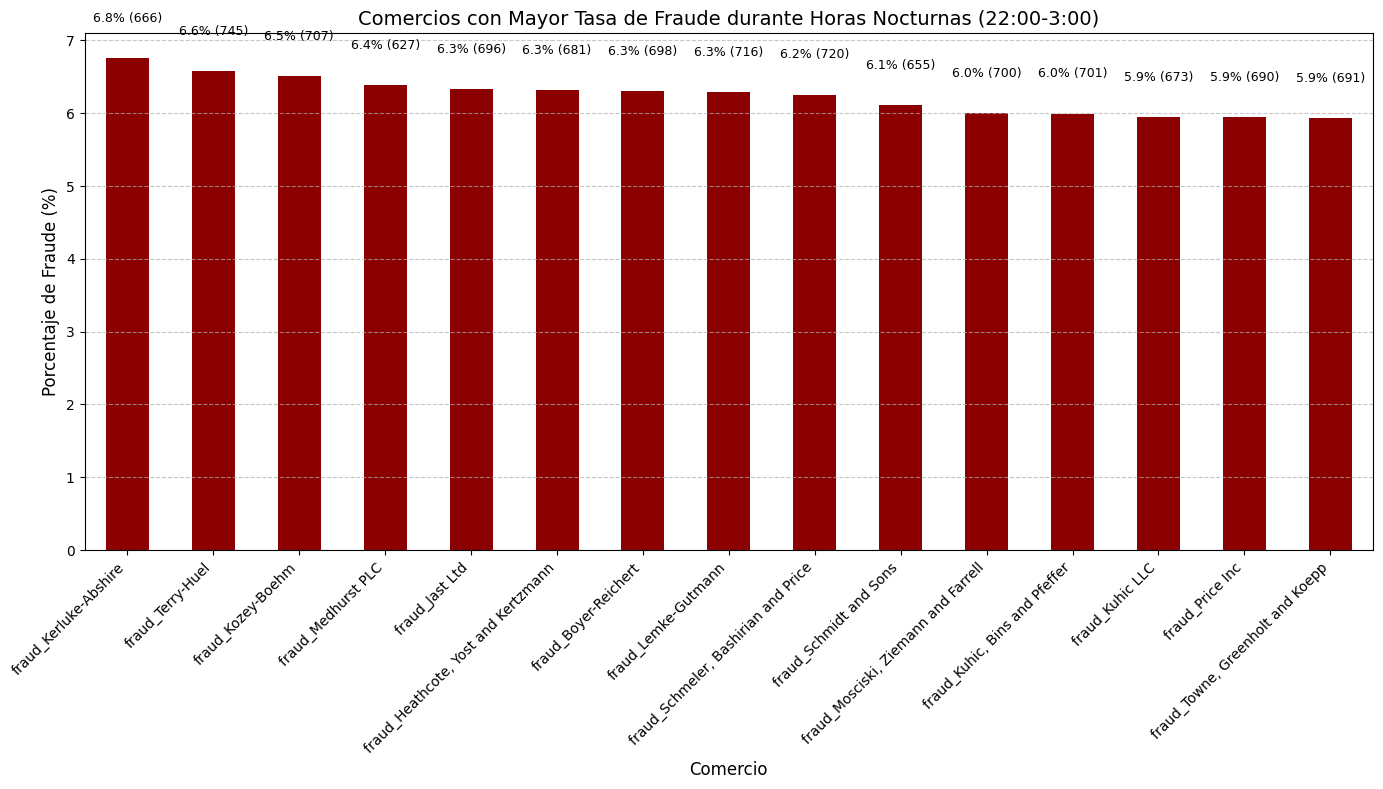

In [ ]:
#Visualizar
plt.figure(figsize=(14, 8))
ax = topFraudMerchants['fraud_percentage'].plot(kind='bar', color='darkred')
plt.title('Comercios con Mayor Tasa de Fraude durante Horas Nocturnas (22:00-3:00)', fontsize=14)
plt.xlabel('Comercio', fontsize=12)
plt.ylabel('Porcentaje de Fraude (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Etiquetas con el porcentaje y el número de transacciones
for i, (pct, count) in enumerate(zip(topFraudMerchants['fraud_percentage'], topFraudMerchants['count'])):
    ax.text(i, pct + 0.5, f"{pct:.1f}% ({count})", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('graphs/night_fraud_by_merchant.png')
plt.show()

### Tasa de transacciones por hora

In [20]:
#Análisis de montos de transacciones por hora del día, separando fraudes y transacciones legítimas
amountByHour = df.groupby(['hour', 'is_fraud'])['amt'].agg(['mean', 'median', 'count']).reset_index()

In [21]:
#Separar en fraudes y legítimas
fraudAmounts = amountByHour[amountByHour['is_fraud'] == 1]
legit_amounts = amountByHour[amountByHour['is_fraud'] == 0]

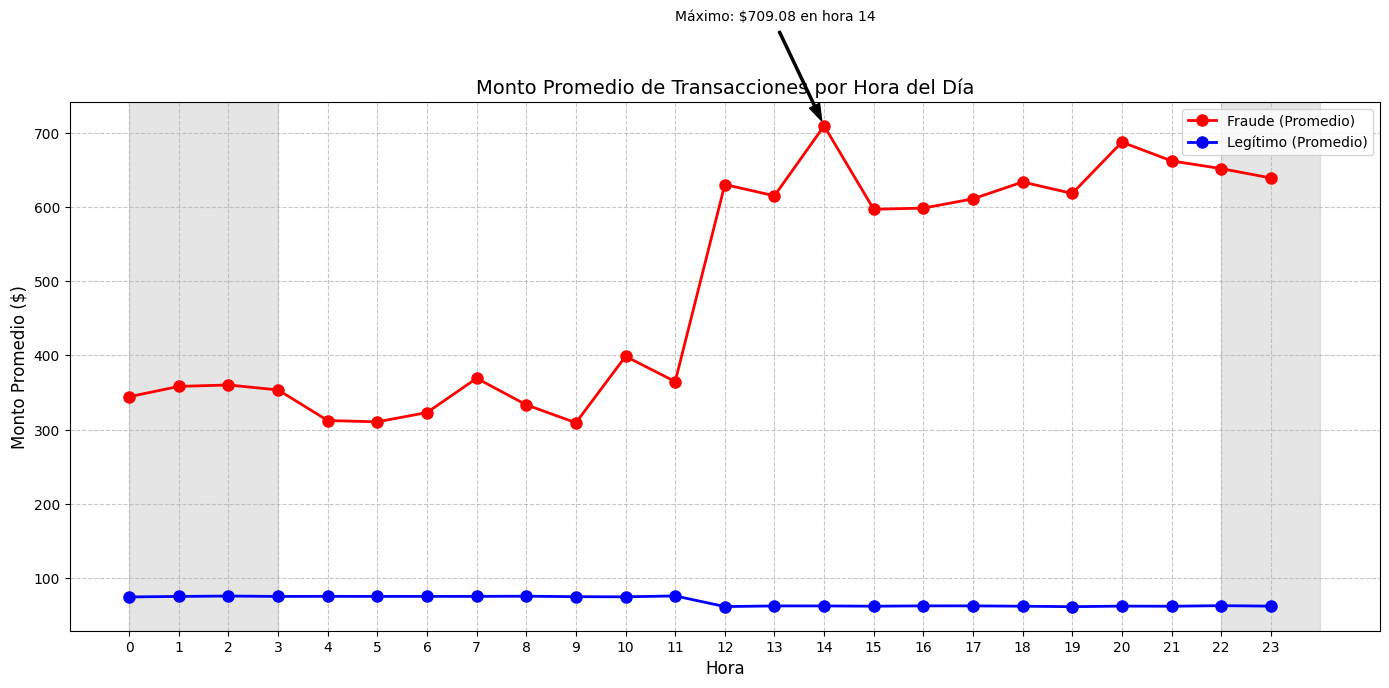

In [22]:
#Visualizar
plt.figure(figsize=(14, 7))

#Graficar los montos promedio
plt.plot(fraudAmounts['hour'], fraudAmounts['mean'], 'ro-', label='Fraude (Promedio)', linewidth=2, markersize=8)
plt.plot(legit_amounts['hour'], legit_amounts['mean'], 'bo-', label='Legítimo (Promedio)', linewidth=2, markersize=8)

#Resaltar la zona de madrugada (22-3)
plt.axvspan(22, 24, alpha=0.2, color='gray')
plt.axvspan(0, 3, alpha=0.2, color='gray')

plt.title('Monto Promedio de Transacciones por Hora del Día', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Monto Promedio ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(0, 24))

#Anotaciones para las zonas de mayor riesgo
max_fraud_hour = fraudAmounts.loc[fraudAmounts['mean'].idxmax()]
plt.annotate(f"Máximo: ${max_fraud_hour['mean']:.2f} en hora {int(max_fraud_hour['hour'])}",
             xy=(max_fraud_hour['hour'], max_fraud_hour['mean']),
             xytext=(max_fraud_hour['hour']-3, max_fraud_hour['mean']*1.2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10)

plt.tight_layout()
plt.savefig('graphs/transaction_amount_by_hour.png')
plt.show()

### Distancia entre el cliente y el comerciante para transacciones nocturnas fraudulentas vs. legítimas

In [23]:
#Distancia entre cliente y comerciante para transacciones nocturnas
nightTransactions = df[(df['hour'] >= 22) | (df['hour'] <= 3)]

In [24]:
#Crear bins de distancia
nightTransactions['distance_bin'] = pd.cut(nightTransactions['dist_between_client_and_merch'], 
                                           bins=[0, 10, 20, 30, 40, 50, 75, 100, 150], 
                                           labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-75', '75-100', '100+'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_72364\821680178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nightTransactions['distance_bin'] = pd.cut(nightTransactions['dist_between_client_and_merch'],


In [25]:
#Calcular tasa de fraude por bin de distancia
distanceFraudRate = nightTransactions.groupby('distance_bin')['is_fraud'].agg(['mean', 'count']).reset_index()
distanceFraudRate['fraud_percentage'] = distanceFraudRate['mean'] * 100

<Figure size 1400x700 with 0 Axes>

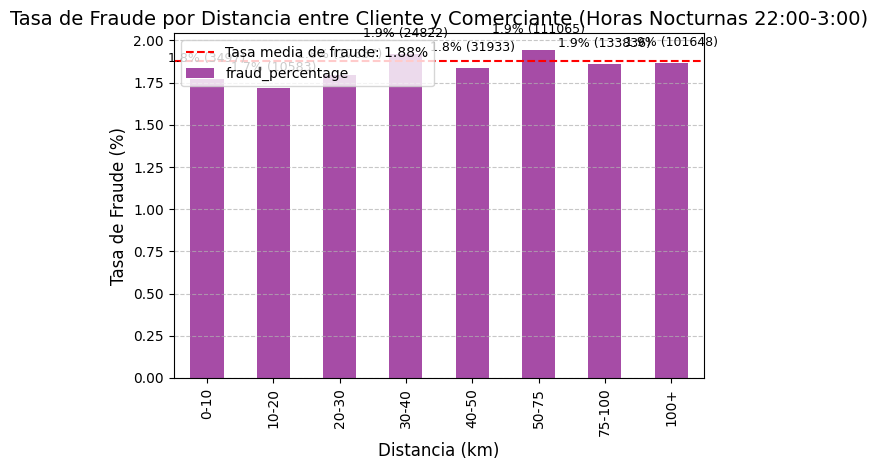

In [26]:
#Visualizar
plt.figure(figsize=(14, 7))
ax = distanceFraudRate.plot(x='distance_bin', y='fraud_percentage', kind='bar', color='purple', alpha=0.7)
plt.title('Tasa de Fraude por Distancia entre Cliente y Comerciante (Horas Nocturnas 22:00-3:00)', fontsize=14)
plt.xlabel('Distancia (km)', fontsize=12)
plt.ylabel('Tasa de Fraude (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Etiquetas con el porcentaje y el número de transacciones
for i, (pct, count) in enumerate(zip(distanceFraudRate['fraud_percentage'], distanceFraudRate['count'])):
    ax.text(i, pct + 0.1, f"{pct:.1f}% ({count})", ha='center', fontsize=9)

#Línea de tendencia
plt.axhline(y=nightTransactions['is_fraud'].mean() * 100, color='red', linestyle='--', 
            label=f'Tasa media de fraude: {nightTransactions["is_fraud"].mean()*100:.2f}%')
plt.legend()

plt.tight_layout()
plt.savefig('graphs/night_fraud_by_distance.png')
plt.show()

## Ingeniería de Variables